## Модель цен на автомобили

Имеется набор данных с признаками автомобилей и ценами на них. Необходимо построить предсказание цены

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
data = pd.read_csv( 'cars.csv', delimiter = '\t' )
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,1.0


In [12]:
data.shape

(804, 12)

In [3]:
X = pd.get_dummies(data.loc[:, ['Mileage', 'Liter', 'Make']])
X.head()

,Mileage,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221.0,3.1,1,0,0,0,0,0
1,9135.0,3.1,1,0,0,0,0,0
2,13196.0,3.1,1,0,0,0,0,0
3,16342.0,3.1,1,0,0,0,0,0
4,19832.0,3.1,1,0,0,0,0,0


In [4]:
y = data[['Price']]
y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [9]:
#model = LinearRegression()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_predict = lr.predict(X_test_scaled)

r2_score(y_test, y_predict)


0.8598098280726092

Попробуем нарисовать как расходится факт с предсказаниями

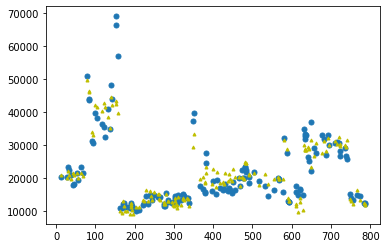

In [10]:
plt.plot(y_test.index, y_test, 'o', markersize = 5)
plt.plot(y_test.index, y_predict, 'y^', markersize = 3)
plt.show()

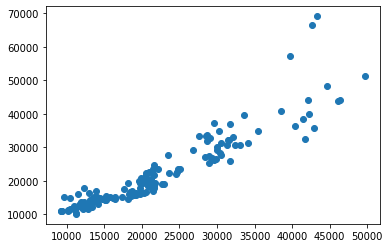

In [11]:
plt.scatter(y_predict, y_test)